> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 5: EDA

## Outline

- Univariate analysis (distributions, histograms, counts)
- Bivariate analysis (correlations, scatterplots, group comparisons)
- Reflections and insights

This lab uses the same dataset from **Lab 4**. You will see some overlap in the initial tasks as the data is cleaned.  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Overview

We will be using the same San Francisco rent dataset as in Lab 4.  Some rentals are apartments, others are for homes, and there may be some other random properties for rent.  Each row represents one rental listing.

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     | Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1)|
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Data

### Instructions:
- Import the `pandas` library for dataframes.  Then `Matplotlib` and `Seaborn` for data visualization.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

! pip install ydata-profiling
from ydata_profiling import ProfileReport

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.1 MB/s eta 0:00:00


In [2]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [6]:
# Preview the first rows
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


## Part 2: Inspecting Data Quality

### Instructions:
- Check for outliers or invalid data in key numeric variables like `price`, `sqft`, `beds`, or `baths`.  The concept of outliers will be covered more in week 6.  This week we will just look for outliers, but we won't take steps to remove them.     

In [7]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,200796.000000,194188.000000,42675.000000,64679.000000
mean,2135.362746,1.889025,1.679086,1201.827688
std,1427.747903,1.079138,0.690509,5000.217864
min,220.000000,0.000000,1.000000,80.000000
25%,1295.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2505.000000,3.000000,2.000000,1360.000000
max,40000.000000,12.000000,8.000000,900000.000000


### In Your Response:
- Do any numeric variables contain extreme or unusual values?
- Should those outlier values be removed?  Or are they valid rental properties?

### ✍️ Your Response: 🔧
Price: The maximum price of $40,000 is significantly higher than the 75th percentile ($$40,000 is significantly higher than the 75th percentile ($2,505) and the average ($2,135). This suggests there are some extremely expensive listings that could be outliers.
Beds: The maximum number of beds is 12, which is quite high for a typical rental, but could represent a very large multi-bedroom property or a data entry error.
Baths: The maximum number of baths is 8, which, similar to beds, is high but potentially valid for a luxury or very large property.
Sqft: The maximum square footage is 900,000 sqft. This is an extremely large value compared to the 75th percentile (1,360 sqft) and the mean (1,201 sqft). This is a strong indicator of a data entry error or an anomaly that needs further investigation. An 80 sqft minimum is very small, but could be a valid tiny living space.
Regarding whether these outlier values should be removed: While values like 900,000 sqft almost certainly represent data errors and could skew analysis, and very high prices, beds, or baths might be unusual, the lab instructions specifically state "This week we will just look for outliers, but we won't take steps to remove them." Therefore, we will note their presence but not remove them at this stage.

## Part 3: Univariate Analysis

Explore individual variables to understand their distributions and frequency.

### Tasks:
- Plot histograms for numeric variables (`price`, `sqft`)
- Plot countplots for categorical variables (`beds`, `nhood`)


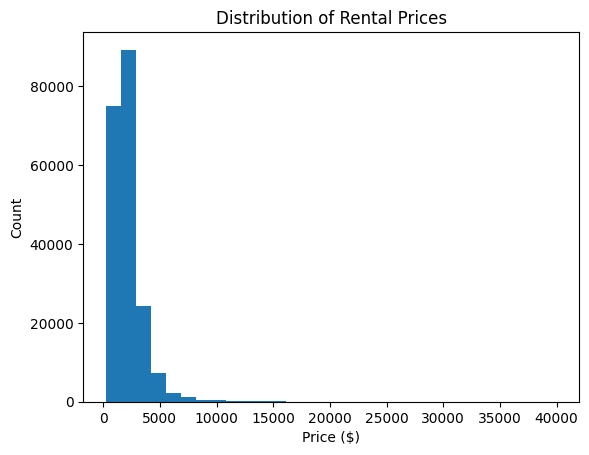

In [8]:
# Histogram: Price
plt.hist(df['price'], bins=30)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

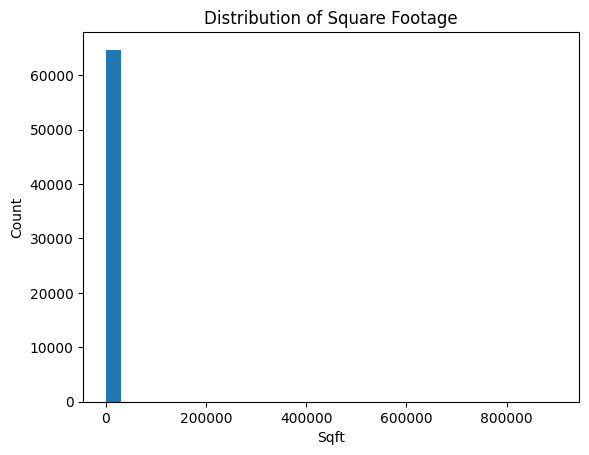

In [9]:
# Histogram: Square Footage
plt.hist(df['sqft'].dropna(), bins=30)
plt.title("Distribution of Square Footage")
plt.xlabel("Sqft")
plt.ylabel("Count")
plt.show()


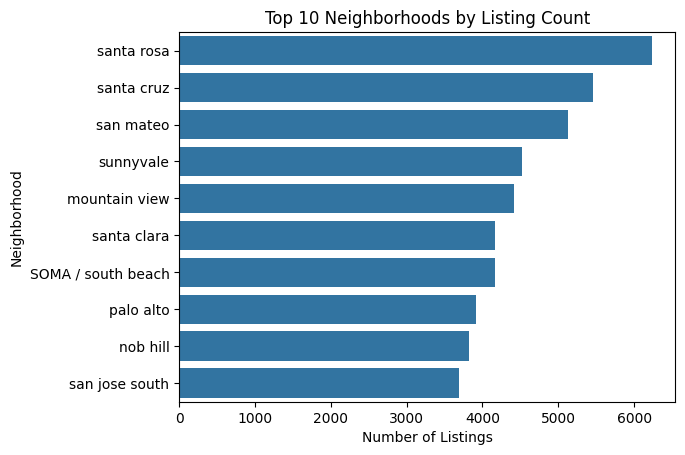

In [10]:
# Bar plot of top 10 neighborhoods by number of listings
top_nhoods = df['nhood'].value_counts().head(10)

sns.barplot(x=top_nhoods.values, y=top_nhoods.index)
plt.title("Top 10 Neighborhoods by Listing Count")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.show()

### 🔧 Try It Yourself – Part 4

1. Create two new visualizations using different variables than the ones already shown above.

>Suggestions:
- A **histogram** of the `baths` variable
- A **bar chart** showing the **average square footage by number of bathrooms**

> Be sure to label your axes and include a title for each chart.

### In Your Response:

After creating each of the visuals, write 1–2 sentences explaining what you notice in each.


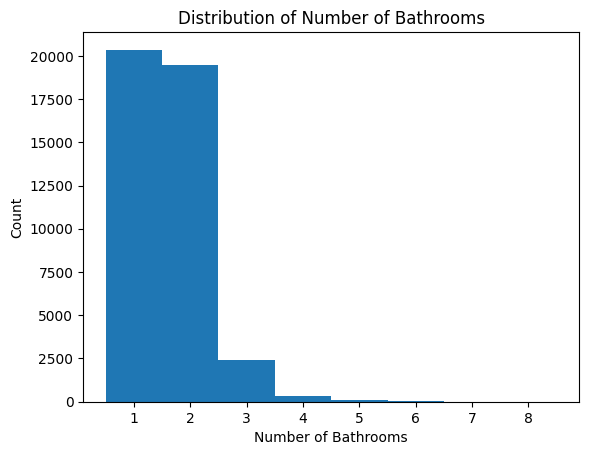

In [14]:
plt.hist(df['baths'].dropna(), bins=range(int(df['baths'].min()), int(df['baths'].max()) + 2), align='left')
plt.title("Distribution of Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.xticks(range(int(df['baths'].min()), int(df['baths'].max()) + 1))
plt.show()

### ✍️ Visual 1 Response: 🔧
1.The histogram for bathrooms shows a distribution heavily skewed towards 1 and 2 bathrooms, indicating that most rental properties have either one or two baths. There's a rapid decrease in frequency for properties with more bathrooms, with very few listings having 3 or more baths, confirming that higher bath counts are much less common.

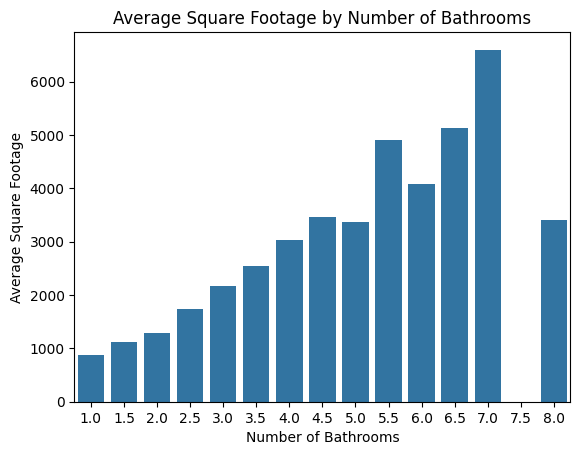

In [15]:
avg_sqft_baths = df.groupby('baths')['sqft'].mean().sort_index()
sns.barplot(x=avg_sqft_baths.index, y=avg_sqft_baths.values)
plt.title("Average Square Footage by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Square Footage")
plt.show()

### ✍️ Visual 2 Response: 🔧
1. The bar chart demonstrates a clear positive correlation between the number of bathrooms and the average square footage, indicating that properties with more bathrooms generally have a larger average square footage. This trend holds consistently, suggesting that as a property's size increases, so does the likelihood of it having more bathrooms.

## Part 4: Bivariate Analysis

Explore relationships between two variables to understand how features like square footage or bedrooms influence price.


In [16]:
# Correlation matrix
corr_matrix = df[['price', 'beds', 'baths', 'sqft']].corr()
corr_matrix


,price,beds,baths,sqft
price,1.000000,0.450096,0.433553,0.074310
beds,0.450096,1.000000,0.651835,0.707235
baths,0.433553,0.651835,1.000000,0.645372
sqft,0.074310,0.707235,0.645372,1.000000


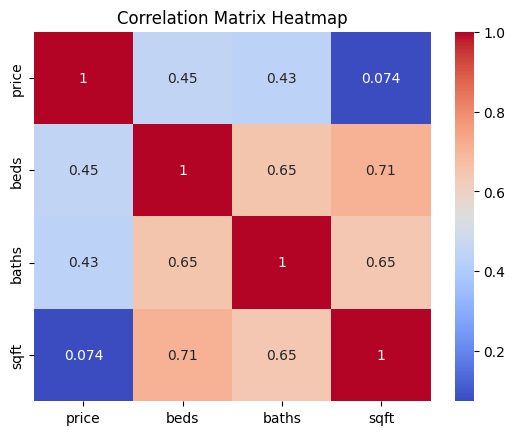

In [17]:
# Heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

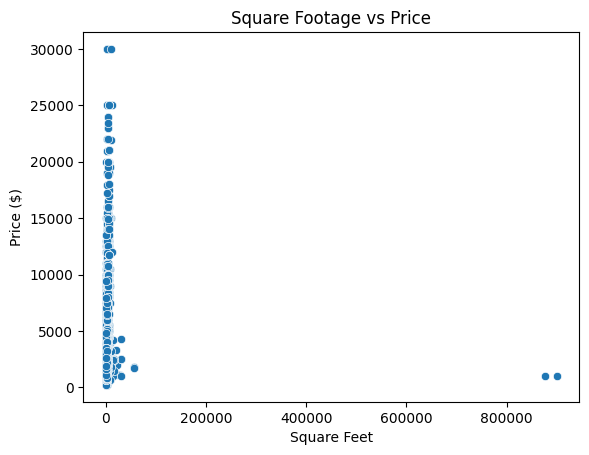

In [18]:
# Scatterplot: Square Footage vs Price
sns.scatterplot(x='sqft', y='price', data=df)
plt.title("Square Footage vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.show()

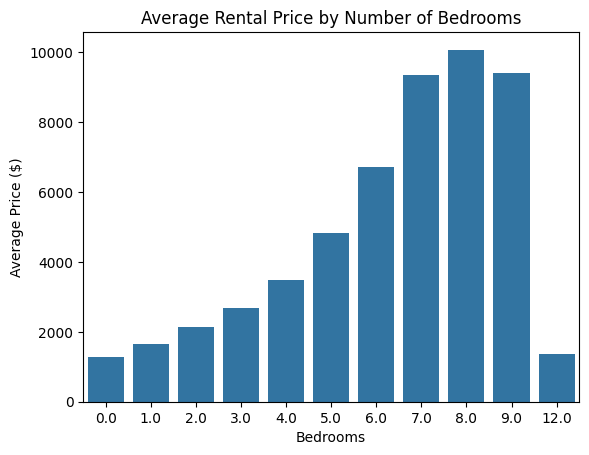

In [19]:
# Average price by number of bedrooms
avg_price_beds = df.groupby('beds')['price'].mean().sort_index()
sns.barplot(x=avg_price_beds.index, y=avg_price_beds.values)
plt.title("Average Rental Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price ($)")
plt.show()

### 🔧 Try It Yourself – Part 5

1. Create a scatterplot of `baths` vs `price`.  
2. Group by `year` and plot the average price over time.

### In Your Response:
1. What trends or outliers do you see?

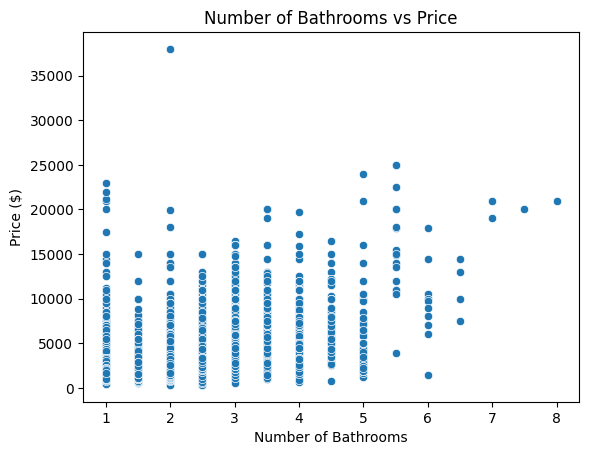

In [20]:
sns.scatterplot(x='baths', y='price', data=df)
plt.title("Number of Bathrooms vs Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price ($)")
plt.show()

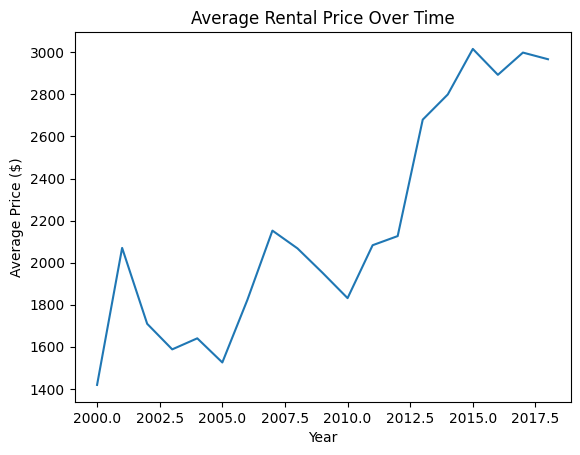

In [21]:
avg_price_year = df.groupby('year')['price'].mean().sort_index()
sns.lineplot(x=avg_price_year.index, y=avg_price_year.values)
plt.title("Average Rental Price Over Time")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.show()

### ✍️ Your Response: 🔧
1.Baths vs Price Scatterplot: The scatterplot of bathrooms vs. price shows a general upward trend, indicating that properties with more bathrooms tend to have higher prices. However, there's significant scattering, especially for properties with fewer bathrooms, suggesting that other factors heavily influence price. There are also clear outliers at the higher end of the price spectrum, with some properties having 1, 2, or 3 baths commanding very high prices, and some very high bath counts (e.g., 7 or 8) which are rare but also show high prices.
Average Price Over Time Plot: The line plot of average rental price over time reveals a noticeable increase in average prices from 2000 to 2018, with a particularly steep rise starting around 2013. There are some minor fluctuations, but the overall trend is one of steady appreciation. No significant outliers in the time trend itself are immediately apparent, but the consistent growth indicates a changing market over the observed period

## 🔧  Part 5: Reflection

Answer the following questions in the markdown cell below (no more than a few sentences per question required)

1. Which variables are most strongly correlated with rental price?
2. Are there patterns in how size (sqft) or number of bedrooms affects price?
3. Which neighborhoods or years show the highest prices?
4. What other visualizations or groupings might improve this analysis?

Use this section to summarize insights from both Labs 4 and 5.

### ✍️ Your Response: 🔧
1. Which variables are most strongly correlated with rental price? Based on the correlation matrix, beds (0.45) and baths (0.43) show the strongest positive correlation with rental price among the numeric variables analyzed. sqft has a much weaker positive correlation (0.07).

2. Are there patterns in how size (sqft) or number of bedrooms affects price? Yes, there are patterns. The number of bedrooms (beds) shows a clear positive pattern: generally, as the number of bedrooms increases, the average rental price also tends to increase. While sqft also generally shows that larger sizes correspond to higher prices, the relationship is much less consistent and more scattered, as indicated by its lower correlation with price.

3. Which neighborhoods or years show the highest prices? Regarding years, the average rental prices show a clear upward trend, with the highest average prices observed in the later years of the dataset, particularly from 2013 to 2018. For neighborhoods, based on the current analysis, we have identified the top neighborhoods by listing count, but not explicitly by highest average price. To determine which neighborhoods show the highest prices, a further analysis grouping average price by neighborhood would be needed.

4. What other visualizations or groupings might improve this analysis? To improve the analysis, we could explore: Box plots or violin plots of price by city or county: To visualize price distributions across different regions. Scatter plot of lat and lon colored by price: To identify geographical patterns in rental prices on a map. Analysis of room_in_apt: To compare prices and other characteristics of rooms versus entire apartments. Regression analysis: To model the relationship between price and multiple predictor variables like beds, baths, and sqft more formally.

## Summary:

### Data Analysis Key Findings

*   The distribution of rental properties by the number of bathrooms is heavily skewed, with the majority of listings having 1 or 2 bathrooms. The frequency of properties rapidly decreases for 3 or more bathrooms.
*   There is a clear positive correlation between the number of bathrooms and the average square footage of rental properties. As the number of bathrooms increases, the average square footage also tends to increase significantly, indicating that larger properties typically accommodate more bathrooms.

### Insights or Next Steps

*   The dominance of 1-2 bathroom properties suggests a high demand or supply for smaller to medium-sized rental units. Further analysis could explore whether this aligns with market demand or if there's an underserved segment for larger properties with more bathrooms.
*   Given the strong correlation between bathrooms and square footage, the number of bathrooms can serve as a reliable indicator of property size, which could be useful for estimations or market segmentation when square footage data is missing or needs validation.


## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [22]:
!jupyter nbconvert --to html "lab_05_GuerreroDiego.ipynb"

[NbConvertApp] Converting notebook lab_05_GuerreroDiego.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 693026 bytes to lab_05_GuerreroDiego.html
